<a href="https://colab.research.google.com/github/victor-hro/insurance-prediction/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas


In [143]:
import pandas as pd
import numpy as np

# visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# Dataframe: Cardio Disease

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
# from google.colab import files
# uploaded = files.upload()

In [146]:
# criando o dataframe
DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/GitHub/insurance/data/insurance.csv'
df = pd.read_csv(DATA_DIR)

# visualizando o cabeçalho e printando algumas informações
print('Linhas: ', df.shape[0])
print('Colunas: ', df.shape[0])

df.head()

Linhas:  1338
Colunas:  1338


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Informações sobre cada coluna:

age: idade do beneficiário primário

sex: sexo do contratente do seguro (Homem/Mulher)

bmi: índice de massa corporal, idealmente 18,5 a 24,9

children: número de filhos cobertos pelo seguro saúde / Número de dependentes

smoker: fumante

region: área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste.

charges: despesas médicas individuais cobradas pelo seguro saúde

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Removendo dados NaN e duplicatas:


### Arquivos NaN:

In [148]:
# Faça seu código a partir dessa linha. O resultado final deverá ser identico a resposta apresentada abaixo.
df.isna().sum()
# Apague o comentário e e comece aqui:

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Duplicatas:

In [149]:
df.duplicated().sum()

1

In [150]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(1338, 7)
(1337, 7)



## Análises estatísticas e visualização de dados

### Distribuição de frequências

podemos classificar nosso conjunto de dados em dois tipos de variáveis: 
* qualitativas: sex, smoker, region
* quantitativas: age, bmi, children, charges

#### Variáveis quantitativas

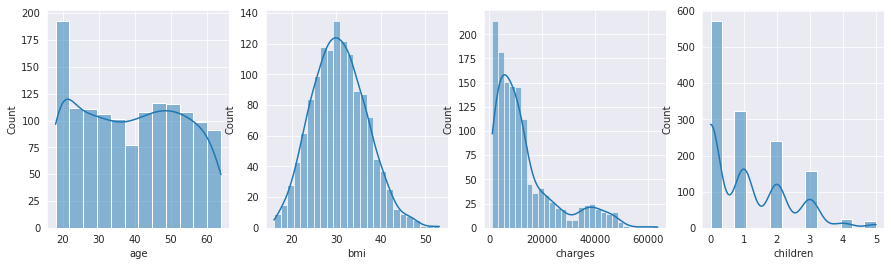

In [151]:
# analisando histogramas de variáveis quantitativas
columns = ['age', 'bmi', 'charges', 'children']
plt.figure(figsize=(15,4))
for i, col in enumerate(columns):
    plt.subplot(1, len(columns), i+1)
    sns.histplot(df,x=col,kde=True);

Após visualizar, surge as seguintes hipóteses:
* age: há uma grande quantidade de sujeitos com 20 anos e uma quantidade menor de sujeitos com 40 anos;
* bmi: o valor de bmi pode tender a uma média aproximada de 30;
* charges: a frequência tende a decrescer conforme o aumento do valor;
* children: a frequência tende a decrescer conforme o aumento do número de crianças.

Analisando o gráfico de barras contendo a quantidade de sujeitos por idade.

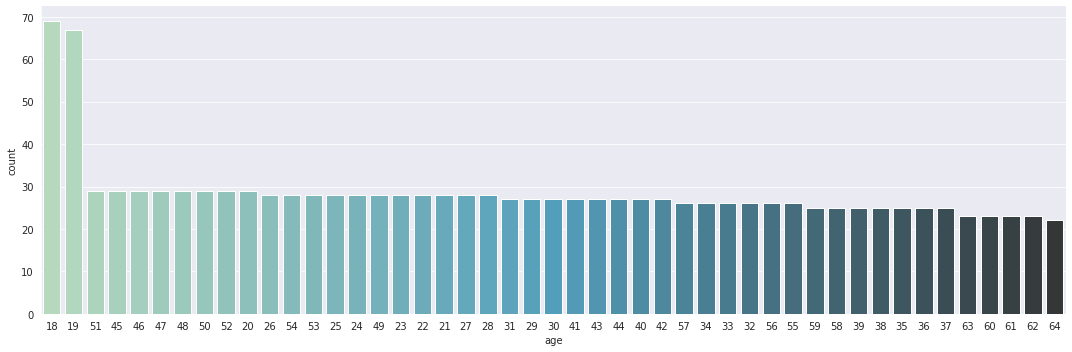

In [152]:
sns.catplot(
        data = df,
        x = 'age',
        kind = "count",
        aspect = 3,
        order= df.age.value_counts().index,
        palette='GnBu_d',
        );



✅ Percebe-se a grande quantidade de pacientes com idade entre 18 a 19 anos, validando a hipótese.

Analisando a moda, mediana e a média da coluna bmi

In [153]:
print('moda: {:.2f}'.format(df.bmi.mode()[0]))
print('mediana: {:.2f}'.format(df.bmi.median()))
print('média: {:.2f}'.format(df.bmi.mean()))
print('O valor predominante é de %.2f e a média é %.2f '% (df.bmi.mode()[0], df.bmi.median()))

moda: 32.30
mediana: 30.40
média: 30.66
O valor predominante é de 32.30 e a média é 30.40 


#### Variáveis qualitativas

<Figure size 1080x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

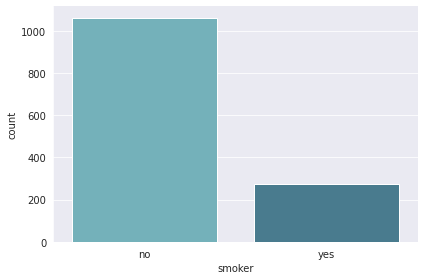

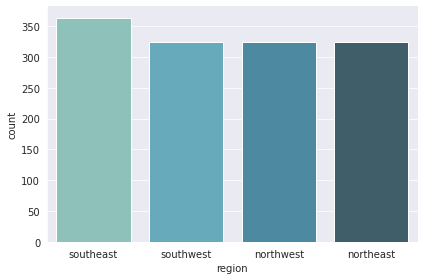

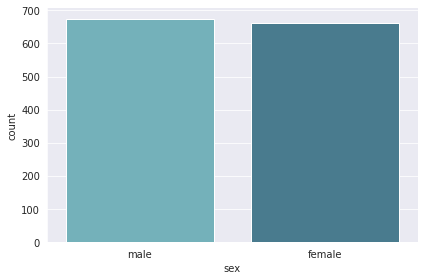

In [154]:
# analisando histogramas de variáveis categóricas

columns = ['smoker', 'region', 'sex']
plt.figure(figsize=(15,4))
for i, col in enumerate(columns):
    plt.figure(i)
    sns.catplot(
        data = df,
        x = col,
        kind = "count",
        height = 4,
        aspect = 1.5,
        order= df[col].value_counts().index,
        palette='GnBu_d'
        )
    plt.tight_layout();

### Correlação e gráfico de dispersão

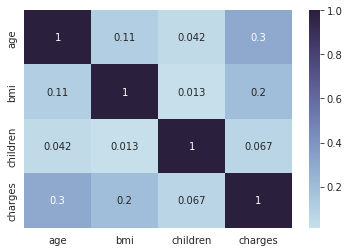

In [155]:
corr = df.corr()
ax = sns.heatmap(corr,  cmap = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True) , annot= True);

Podemos notar que as despesas médicas está mais correlacionada com a idade com o bmi do sujeito. Já o número de crianças apresenta apenas 6% de correlação.

#### custo relacionado a pacientes fumantes e não fumantes

TypeError: ignored

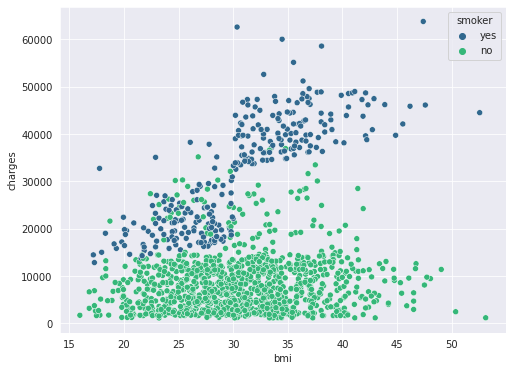

In [156]:
# analisando o gráfico de dispersão para pacientes fumantes e não fumantes, relacionados com os valores de bmi e charges.

# dimensões da figura
plt.figure(figsize=(8,6))

# gráfico de dispersão
sns.scatterplot(
    data=df,
    x='bmi',
    y='charges',
    palette='viridis',
    hue='smoker'
    );

plt.title('BMI vs. Charges [fumantes / não fumantes]')
plt.tight_layout()

✅ Pode-se perceber que o valor de charges é maior para pacientes com bmi acima de 30 - que consequentemente é a média do conjunto. O valor se torna maior ainda quando há ocorrência de sujeitos fumantes.

In [ ]:
# dimensões da figura
plt.figure(figsize=(8,6))

# gráfico de dispersão
sns.scatterplot(
    data=df,
    x='age',
    y='charges',
    palette='viridis',
    hue='smoker'
    );

plt.title('Age vs. Charges [fumantes / não fumantes]')
plt.tight_layout()

✅ Pode-se notar que o valor tende a crescer conforme a idade, porém fica ainda maior caso haja pacientes fumantes. 



In [ ]:
# dimensões da figura
plt.figure(figsize=(8,6))

# gráfico de dispersão
sns.scatterplot(
    data=df,
    x='children',
    y='charges',
    palette='GnBu_d',
    hue='smoker'
    );

plt.title('Children vs. Charges [fumantes / não fumantes]')
plt.tight_layout()

✅ Conforme analisamos anteriormente, as despesas estão descorrelacionadas com o número de crianças. Visualmente não tem como definir que o número de crianças está interferindo no valor, apenas podem ser criadas hipóteses do porquê os sujeitos com 4 e 5 crianças contém um menor valor.

### Medidas separatrizes

In [ ]:
data_col_smoker = df.groupby('smoker').describe()
data_col_smoker

In [ ]:
# gráfico de dispersão
sns.boxplot(
    data=df,
    x='bmi',
    y='smoker',
    orient='h'
    );

In [ ]:
data_col_smoker['bmi']

✅ Pode haver outliers. É importante um estudo melhor sobre a relação entre bmi e fumantes.

✅ 75% dos sujeitos fumantes e não fumantes coincidentemente estão com bmi acima de 26, mediana aproximadamente a 30 e desvio padrão aproximado de 6.

✅ Alguns sujeitos podem apresentar doenças que impossibilitam de fumar, porém essas informações não foram disponibilizadas no conjunto de dados.

In [ ]:
# gráfico de dispersão
sns.boxplot(
    data=df,
    x='age',
    y='smoker',
    orient='h'
    );

In [ ]:
data_col_smoker['age']

In [ ]:
df[['age','bmi']].corr()

✅ a mediana é aproximada;

✅ podemos perceber que a metade dos pacientes fumantes está com uma distribuição de idade entre 27 anos a 49.

✅ bmi tem uma correlação de apenas 10% relacionada a idade.

In [ ]:
# gráfico de dispersão
sns.boxplot(
    data=df,
    x='charges',
    y='smoker',
    orient='h'
    );

✅ Não podemos considerar como um fator isolado, apenas pelo fato do paciente fumar, pois existem outras doenças que impossibilitam o sujeito de ser fumante, como câncer e leucêma, que consequentemente fazem as despesas aumentarem. Como não temos essas informações, há a possibilidade de considerarmos que o conjunto possui outliers.

In [ ]:
# gráfico de dispersão
sns.boxplot(
    data=df,
    x='bmi',
    y='smoker',
    orient='h'
    );

✅ Há alguns outliers que merecem estudo posterior.

# Modelo de Machine Learning

## Preparando os dados

In [ ]:
df.head(2)

### Convertendo algumas variáveis para dados categoricos

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_df = df.copy()
# Convertendo as colunas categóricas para arrays de valores inteiros.
train_df.sex = le.fit_transform(train_df.sex)
train_df.smoker = le.fit_transform(train_df.smoker)
train_df.region = le.fit_transform(train_df.region)

In [ ]:
print(f'Quantidade de rótulos para a coluna sex: {train_df.sex.nunique()}')
print(f'Quantidade de rótulos para a coluna smoker: {train_df.smoker.nunique()}')
print(f'Quantidade de rótulos para a coluna region: {train_df.region.nunique()}')

train_df.head()

In [ ]:
# escolhendo todas as features, exceto charges, que é nosso target
X = train_df.drop(columns=['charges'], axis=1)

# analisando alguns valores de X
X.shape

In [ ]:
y = train_df['charges']

# analisando alguns valores de y
y.shape

Agora que já temos nossos valores de X e y bem definidos, poderemos dividir em conjunto de dados para treinamento, validação e teste. Para isso, vamos utilizar 60% para treinamento e 20% para validação e 20% para teste.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print()
print(X_val.shape)
print(y_val.shape)
print()
print(X_test.shape)
print(y_test.shape)

## Treinando o modelo

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# instanciando a função
model = XGBRegressor()

# treinando
model.fit(X_train, y_train)

In [ ]:
# from sklearn.metrics import mean_squared_error

score_treinamento = model.score(X_train, y_train)
score_teste = model.score(X_test, y_test)
print(
    f'Score do conjunto de treinamento: {score_treinamento}')
print(
    f'Score do conjunto de teste: {score_teste}')

In [ ]:
def plot_regression(y_true, y_pred):
    
    y_true = y_true.to_numpy()
    idx = y_true.argsort()

    plt.figure(figsize=(8,6))
    plt.plot(y_true[idx], y_true[idx], 'b-')
    plt.plot(y_true, y_pred, 'r.')

    plt.xaxis= 'y_true'
    plt.yaxis= 'y_pred'
    plt.title= 'Erro residual'

    plt.tight_layout()

pred_test = model.predict(X_test)
plot_regression(y_test, pred_test)

In [ ]:
# Erro residual
plt.figure(figsize=(8,6))

ax = sns.distplot((y_test- pred_test), color='b')

ax.set_xlabel('erro')
ax.set_ylabel('densidade')
ax.set_title('Erro residual\nmédia:{:.2f}'.format(np.mean((y_test- pred_test))))

plt.axvline(np.mean((y_test- pred_test)), color='black')
plt.set_style = 'dashed'
plt.set_legend = 'média'

plt.tight_layout();

# Removendo outliers e treinando novamente

Após as análises feitas, consideramos que os valores acima de 20k, para pacientes não fumantes, não condizem com a distribuição do conjunto. Chegamos a essa conclusão apenas pelo fato de não haver outras informações sobre o estado físico e mental do paciente.

In [ ]:
# gráfico de dispersão
sns.boxplot(
    data=df,
    x='charges',
    y='smoker',
    orient='h'
    );

In [ ]:
df.drop(df.loc[(df.smoker == 'no') & (df.charges>20000)].index, inplace=True)

In [ ]:
# gráfico de dispersão
sns.boxplot(
    data=df,
    x='charges',
    y='smoker',
    orient='h'
    );

# Treinando sem as outliers

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_df = df.copy()
# Convertendo as colunas categóricas para arrays de valores inteiros.
train_df.sex = le.fit_transform(train_df.sex)
train_df.smoker = le.fit_transform(train_df.smoker)
train_df.region = le.fit_transform(train_df.region)

In [ ]:
# escolhendo todas as features, exceto charges, que é nosso target
X = train_df.drop(columns=['charges'], axis=1)
y = train_df['charges']

X.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print()
print(X_val.shape)
print(y_val.shape)
print()
print(X_test.shape)
print(y_test.shape)

In [ ]:
# instanciando a função
model = XGBRegressor()

# treinando
model.fit(X_train, y_train)

score_treinamento = model.score(X_train, y_train)
score_teste = model.score(X_test, y_test)
print(
    f'Score do conjunto de treinamento: {score_treinamento}')
print(
    f'Score do conjunto de teste: {score_teste}')

In [ ]:
pred_test = model.predict(X_test)
plot_regression(y_test, pred_test)

In [ ]:
# Erro residual
plt.figure(figsize=(8,6))

ax = sns.distplot((y_test- pred_test), color='b')

ax.set_xlabel('erro')
ax.set_ylabel('densidade')
ax.set_title('Erro residual\nmédia:{:.2f}'.format(np.mean((y_test- pred_test))))

plt.axvline(np.mean((y_test- pred_test)), color='black')
plt.set_style = 'dashed'
plt.set_legend = 'média'

plt.tight_layout();